### The Centers for Medicare & Medicaid Services (CMS) rates hospitals in the U.S. on a scale of 1-5 to make it easier for patients and consumers to compare the quality of services offered by hospitals. Building a classification model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm from SVC
from sklearn.metrics import accuracy_score

In [ ]:
#Reading hospital dataset
hospData = pd.read_csv("https://raw.githubusercontent.com/dearbharat/datasets/main/hospital.csv")
hospData.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Voluntary,Yes,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [ ]:
#Describing the hospital dataset
hospData.describe(include='all')

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
count,3057.000000,3057,3057,3057,3057,3057.000000,3057,3.057000e+03,3057,3057,...,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
unique,NaN,2941,3047,1874,51,NaN,1038,NaN,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,CHICAGO,CA,NaN,LOS ANGELES,NaN,Voluntary,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10,4,26,283,NaN,74,NaN,1906,2950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,261817.891397,NaN,NaN,NaN,NaN,51757.296696,NaN,5.913678e+09,NaN,NaN,...,-0.963980,-0.871177,-0.986907,-0.842215,-8.697796,-2.937054,-4.716686,-2.965375,-39.967077,-9.146034
std,159800.930561,NaN,NaN,NaN,NaN,27935.174759,NaN,2.383292e+09,NaN,NaN,...,0.644294,0.449185,0.669359,0.485605,9.039672,5.102808,1.618808,1.422932,4.684942,4.802502
min,10001.000000,NaN,NaN,NaN,NaN,613.000000,NaN,9.369338e+08,NaN,NaN,...,-5.216000,-4.819000,-7.017000,-3.741000,-76.200000,-56.300000,-13.600000,-14.000000,-63.400000,-64.300000
25%,110089.000000,NaN,NaN,NaN,NaN,30223.000000,NaN,3.607345e+09,NaN,NaN,...,-1.065000,-0.871177,-0.987212,-1.110000,-9.900000,-2.936245,-5.200000,-3.200000,-39.964766,-10.100000
50%,260022.000000,NaN,NaN,NaN,NaN,48617.000000,NaN,6.072744e+09,NaN,NaN,...,-0.963980,-0.871177,-0.987212,-0.841970,-6.100000,-1.100000,-4.716942,-2.964405,-39.964766,-8.900000
75%,390142.000000,NaN,NaN,NaN,NaN,76017.000000,NaN,8.059556e+09,NaN,NaN,...,-0.630000,-0.871177,-0.712000,-0.554000,-3.400000,-0.200000,-4.000000,-2.200000,-39.964766,-6.600000


In [ ]:
hospData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

<AxesSubplot: ylabel='Frequency'>

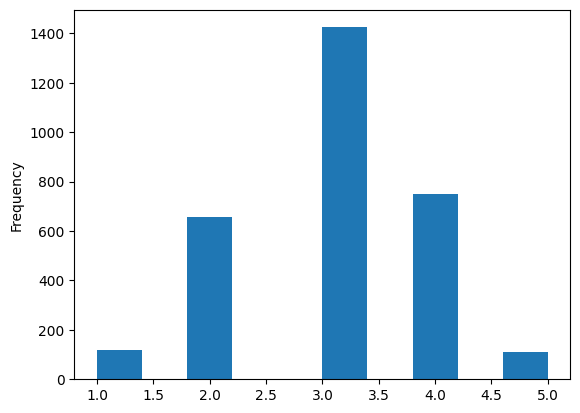

In [ ]:
#Visualizing the overall rating column
hospData['Hospital overall rating'].plot.hist()

In [ ]:
hospData['State'].describe(include='all')

count     3057
unique      51
top         CA
freq       283
Name: State, dtype: object

In [ ]:
hospData['Hospital overall rating'].describe(include='all')

count    3057.000000
mean        3.025842
std         0.869600
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Hospital overall rating, dtype: float64

After comparing the description of state and hospital overall rating columns, observed that the data types are different.

In [ ]:
hospData['Hospital overall rating']= np.where(hospData['Hospital overall rating']<=3, 0, hospData['Hospital overall rating'])
hospData['Hospital overall rating']= np.where(hospData['Hospital overall rating']>3, 1, hospData['Hospital overall rating'])
hospData['Hospital overall rating']

0       0
1       0
2       0
3       0
4       0
       ..
3052    1
3053    0
3054    0
3055    0
3056    0
Name: Hospital overall rating, Length: 3057, dtype: int64

In [ ]:
pd.get_dummies(hospData['Hospital overall rating'])

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3052,0,1
3053,1,0
3054,1,0
3055,1,0


In [ ]:
X=hospData[['Provider ID', 'Hospital Name','Mortality national comparison','Safety of care national comparison','Readmission national comparison','Patient experience national comparison','Effectiveness of care national comparison','Timeliness of care national comparison','Efficient use of medical imaging national comparison', 'MORT_30_AMI_Score', 'MORT_30_CABG_Score','MORT_30_COPD_Score','MORT_30_HF_Score','MORT_30_PN_Score','MORT_30_STK_Score']]
X.head(50)

,Provider ID,Hospital Name,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1,2,1,0,1,1,1,-12.500000,-4.200000,-9.3,-12.400000,-15.500000,-15.40000
1,10005,MARSHALL MEDICAL CENTER SOUTH,0,1,2,1,1,2,0,-16.000000,-3.331371,-7.6,-15.500000,-20.800000,-15.50000
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,0,1,1,0,1,2,1,-16.700000,-4.100000,-7.1,-15.600000,-18.200000,-17.90000
3,10007,MIZELL MEMORIAL HOSPITAL,1,1,0,1,1,2,1,-14.054091,-3.331371,-9.3,-14.400000,-18.800000,-16.60000
4,10008,CRENSHAW COMMUNITY HOSPITAL,1,1,1,1,1,2,1,-14.054091,-3.331371,-8.2,-12.700000,-15.700000,-14.88976
5,10011,ST VINCENT'S EAST,1,0,1,0,0,1,1,-13.900000,-3.700000,-7.4,-13.800000,-17.900000,-12.60000
6,10012,DEKALB REGIONAL MEDICAL CENTER,0,1,1,1,1,2,1,-16.800000,-3.331371,-9.2,-12.500000,-26.800000,-15.80000
7,10016,SHELBY BAPTIST MEDICAL CENTER,1,2,2,0,2,0,0,-14.700000,-3.600000,-8.1,-14.000000,-16.100000,-15.80000
8,10019,HELEN KELLER MEMORIAL HOSPITAL,0,0,0,0,1,2,0,-15.600000,-3.331371,-8.7,-12.900000,-19.100000,-15.40000
9,10021,DALE MEDICAL CENTER,1,1,1,2,2,2,1,-14.054091,-3.331371,-6.4,-12.200000,-14.300000,-16.50000


In [ ]:
#Checking null contained columns in X
nan_cols = [i for i in X.columns if X[i].isnull().any()]
nan_cols

[]

In [ ]:
Y=hospData['Hospital overall rating']

In [ ]:
#Finding numerical columns
numericalCols = X.select_dtypes(include=['float64', 'int64'])
numericalCols

,Provider ID,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score
0,10001,1,2,1,0,1,1,1,-12.500000,-4.200000,-9.300000,-12.400000,-15.5,-15.40000
1,10005,0,1,2,1,1,2,0,-16.000000,-3.331371,-7.600000,-15.500000,-20.8,-15.50000
2,10006,0,1,1,0,1,2,1,-16.700000,-4.100000,-7.100000,-15.600000,-18.2,-17.90000
3,10007,1,1,0,1,1,2,1,-14.054091,-3.331371,-9.300000,-14.400000,-18.8,-16.60000
4,10008,1,1,1,1,1,2,1,-14.054091,-3.331371,-8.200000,-12.700000,-15.7,-14.88976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,670085,1,1,1,1,2,1,1,-14.054091,-3.331371,-7.800000,-10.200000,-15.7,-14.88976
3053,670088,1,1,1,2,1,2,1,-14.100000,-3.331371,-7.900000,-11.300000,-15.5,-15.10000
3054,670092,1,1,1,0,0,2,1,-14.000000,-3.331371,-8.074015,-11.500000,-15.2,-14.88976
3055,670096,1,1,2,0,0,1,1,-13.400000,-3.331371,-8.700000,-12.700000,-15.0,-14.88976


In [ ]:
#Creating scaler object
scaler = StandardScaler()

In [ ]:
#Fitting numericals columns of X in a scaler object
scaled_X = scaler.fit_transform(numericalCols)



In [ ]:
X = np.random.normal()
X = pd.DataFrame(scaled_X, columns=['Provider ID',
'Mortality national comparison','Safety of care national comparison',
'Readmission national comparison','Patient experience national comparison',
'Effectiveness of care national comparison','Timeliness of care national comparison',
'Efficient use of medical imaging national comparison', 'MORT_30_AMI_Score', 'MORT_30_CABG_Score',
'MORT_30_COPD_Score','MORT_30_HF_Score','MORT_30_PN_Score','MORT_30_STK_Score'])
X.head()

,Provider ID,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score
0,-1.576074,-0.038539,1.379632,0.025033,-1.173597,-0.297814,0.031378,-0.012999,1.415547,-1.710498e+00,-1.075892,-0.246341,0.393442,-0.336037
1,-1.576049,-2.069811,-0.061768,1.391587,0.077776,-0.297814,1.363650,-2.104441,-1.776693,-4.372485e-15,0.414441,-2.378930,-2.054187,-0.401864
2,-1.576043,-2.069811,-0.061768,0.025033,-1.173597,-0.297814,1.363650,-0.012999,-2.415141,-1.513579e+00,0.852774,-2.447723,-0.853463,-1.981720
3,-1.576036,-0.038539,-0.061768,-1.341521,0.077776,-0.297814,1.363650,-0.012999,-0.001891,-4.372485e-15,-1.075892,-1.622205,-1.130553,-1.125965
4,-1.576030,-0.038539,-0.061768,0.025033,0.077776,-0.297814,1.363650,-0.012999,-0.001891,-4.372485e-15,-0.111559,-0.452721,0.301078,-0.000160


In [ ]:
#Splitting train and test dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=0)

In [ ]:
#Creating dummy variables for categorical inputs
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
naiveGaussClass= GaussianNB()
naiveGaussClass.fit(X_train,Y_train)

GaussianNB()

In [ ]:
Y_predict=naiveGaussClass.predict(X_test)
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       655
           1       0.79      0.73      0.76       263

    accuracy                           0.87       918
   macro avg       0.84      0.83      0.83       918
weighted avg       0.87      0.87      0.87       918



### Implementing the SVM classification algorithm

In [ ]:
svmClass = SVC(kernel='linear', C=1.0, random_state=42)
svmClass.fit(X_train, Y_train)

BernoulliNB()

In [ ]:
Y_predSvm = svmClass.predict(X_test)
print(classification_report(Y_test,Y_predSvm))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       655
           1       0.74      0.50      0.59       263

    accuracy                           0.81       918
   macro avg       0.78      0.71      0.73       918
weighted avg       0.80      0.81      0.79       918



In [ ]:
hospNotRatedData = pd.read_csv("https://raw.githubusercontent.com/ShriHemaPriya/MBAPO/main/hospital_not_yet_rated.csv")
hospNotRatedData.head()

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,520189,Government,Yes,2,1,2,2,2,2,1,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,370029,Government,No,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,370032,Others,Yes,1,2,1,0,1,1,1,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,370036,Government,Yes,1,1,1,1,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957


In [ ]:
A=hospNotRatedData[['Provider ID','Mortality national comparison','Safety of care national comparison','Readmission national comparison','Patient experience national comparison','Effectiveness of care national comparison','Timeliness of care national comparison','Efficient use of medical imaging national comparison', 'MORT_30_AMI_Score', 'MORT_30_CABG_Score','MORT_30_COPD_Score','MORT_30_HF_Score','MORT_30_PN_Score','MORT_30_STK_Score']]
A.head(50)

,Provider ID,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score
0,520139,1,1,2,2,2,2,1,-12.500000,-3.331371,-8.2,-13.6,-14.1,-15.20000
1,520189,2,1,2,2,2,2,1,-13.800000,-3.331371,-8.1,-11.8,-16.1,-16.60000
2,370029,1,1,1,1,1,2,1,-14.054091,-3.331371,-7.9,-11.8,-17.0,-15.90000
3,370032,1,2,1,0,1,1,1,-15.700000,-3.400000,-7.9,-11.2,-17.5,-17.30000
4,370036,1,1,1,1,0,2,1,-14.054091,-3.331371,-7.1,-11.3,-18.3,-14.88976
5,370037,1,2,0,1,1,1,0,-14.200000,-2.600000,-8.7,-12.8,-15.4,-14.50000


In [ ]:
#Finding numerical columns from hospital_not_rated_data dataset
numCols = A.select_dtypes(include=['float64', 'int64'])
numCols

,Provider ID,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score
0,520139,1,1,2,2,2,2,1,-12.500000,-3.331371,-8.2,-13.6,-14.1,-15.20000
1,520189,2,1,2,2,2,2,1,-13.800000,-3.331371,-8.1,-11.8,-16.1,-16.60000
2,370029,1,1,1,1,1,2,1,-14.054091,-3.331371,-7.9,-11.8,-17.0,-15.90000
3,370032,1,2,1,0,1,1,1,-15.700000,-3.400000,-7.9,-11.2,-17.5,-17.30000
4,370036,1,1,1,1,0,2,1,-14.054091,-3.331371,-7.1,-11.3,-18.3,-14.88976
5,370037,1,2,0,1,1,1,0,-14.200000,-2.600000,-8.7,-12.8,-15.4,-14.50000


In [ ]:
#Fitting numericals columns of A in a scaler object
scaled_data = scaler.fit_transform(numCols)
A = np.random.normal()
A = pd.DataFrame(scaled_data, columns=['Provider ID',
'Mortality national comparison','Safety of care national comparison',
'Readmission national comparison','Patient experience national comparison',
'Effectiveness of care national comparison','Timeliness of care national comparison',
'Efficient use of medical imaging national comparison', 'MORT_30_AMI_Score', 'MORT_30_CABG_Score',
'MORT_30_COPD_Score','MORT_30_HF_Score','MORT_30_PN_Score','MORT_30_STK_Score'])
A.head()

,Provider ID,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score
0,1.413860,-0.447214,-0.707107,1.212678,1.212678,1.212678,0.707107,0.447214,1.664828,-0.396173,-0.453703,-1.777493,1.657008,0.543038
1,1.414567,2.236068,-0.707107,1.212678,1.212678,1.212678,0.707107,0.447214,0.269748,-0.396173,-0.244302,0.332059,0.216131,-0.887013
2,-0.707170,-0.447214,-0.707107,-0.242536,-0.242536,-0.242536,0.707107,0.447214,-0.002927,-0.396173,0.174501,0.332059,-0.432263,-0.171987
3,-0.707128,-0.447214,1.414214,-0.242536,-1.697749,-0.242536,-1.414214,0.447214,-1.769215,-0.642325,0.174501,1.035243,-0.792482,-1.602038
4,-0.707071,-0.447214,-0.707107,-0.242536,-0.242536,-1.697749,0.707107,0.447214,-0.002927,-0.396173,1.849713,0.918046,-1.368833,0.859937


In [ ]:
#Predicting the ratings for hospital_not_rated_data dataset
rating=naiveGaussClass.predict(A)
print(rating)

[1 1 0 0 0 0]


In [ ]:
A['Hospital overall rating']= rating
A.head(10)

,Provider ID,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,Hospital overall rating
0,1.413860,-0.447214,-0.707107,1.212678,1.212678,1.212678,0.707107,0.447214,1.664828,-0.396173,-0.453703,-1.777493,1.657008,0.543038,1
1,1.414567,2.236068,-0.707107,1.212678,1.212678,1.212678,0.707107,0.447214,0.269748,-0.396173,-0.244302,0.332059,0.216131,-0.887013,1
2,-0.707170,-0.447214,-0.707107,-0.242536,-0.242536,-0.242536,0.707107,0.447214,-0.002927,-0.396173,0.174501,0.332059,-0.432263,-0.171987,0
3,-0.707128,-0.447214,1.414214,-0.242536,-1.697749,-0.242536,-1.414214,0.447214,-1.769215,-0.642325,0.174501,1.035243,-0.792482,-1.602038,0
4,-0.707071,-0.447214,-0.707107,-0.242536,-0.242536,-1.697749,0.707107,0.447214,-0.002927,-0.396173,1.849713,0.918046,-1.368833,0.859937,0
5,-0.707057,-0.447214,1.414214,-1.697749,-0.242536,-0.242536,-1.414214,-2.236068,-0.159507,2.227017,-1.500710,-0.839914,0.720438,1.258063,0


In [ ]:
hospNotRatedData['Hospital overall rating']=rating
hospNotRatedData.head(10)

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score,Hospital overall rating
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,...,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000,1
1,520189,Government,Yes,2,1,2,2,2,2,1,...,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000,1
2,370029,Government,No,1,1,1,1,1,2,1,...,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000,0
3,370032,Others,Yes,1,2,1,0,1,1,1,...,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000,0
4,370036,Government,Yes,1,1,1,1,0,2,1,...,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957,0
5,370037,Voluntary,Yes,1,2,0,1,1,1,0,...,-0.871177,-1.179000,-0.68600,-17.900000,-7.100000,-4.000000,-2.500000,-37.900000,-15.000000,0


In [ ]:
analyzeCols=hospNotRatedData[['Mortality national comparison','Safety of care national comparison',
'Patient experience national comparison','Effectiveness of care national comparison',
'Timeliness of care national comparison','Efficient use of medical imaging national comparison','Hospital overall rating']]
analyzeCols

,Mortality national comparison,Safety of care national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Hospital overall rating
0,1,1,2,2,2,1,1
1,2,1,2,2,2,1,1
2,1,1,1,1,2,1,0
3,1,2,0,1,1,1,0
4,1,1,1,0,2,1,0
5,1,2,1,1,1,0,0


Upon analyzing the above columns, it becomes evident that the low-rated hospitals have received poor ratings in two columns: patient experience and effectiveness of care national comparison. The low-rated patient experience could indicate that patients are dissatisfied with the quality of care they received. The low effectiveness of care national comparison rating could imply that patients are not receiving the best possible care for their conditions. By recommending that the features such as Patient experience, Effectiveness of care national comparison need to be improvised in order to improve the hospital's overall rating.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2dbe32be-e994-4f53-a670-d1aa34020dfb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>